#Proyecto Módulo 1 - Análisis y Visualización de Datos

###Presentado por: **Sebastian Rendón Patiño**
###**Ingeniero de Sistemas y Telecomunicaciones**
---
Conjunto de datos.
[German Credit Risk](https://www.kaggle.com/datasets/uciml/german-credit)

## **1. Introducción**
###Propósito del análisis
---
El propósito de este desarrollo consiste aplicar la metodología de trabajo ***CRISP-DM***, vista a lo largo del curso, en el transcurso del desarrollo se aplicaran los conceptos vistos y se implementaran las líbrerias que permitan realizar un correcto proceso de Entendimiento del Negocio, Entendimiento de los datos, Preparación de los datos, Visualizacin de datos y Conclusiones.

###**Conjunto de Datos**

Según el origen del conjunto de datos, es la reducción de un conjunto de datos inicial que contiene información de riesgo crediticio de cierto banco alemán, según la explicación en la página se debe a que el conjunto de datos inicial contiene, ciertas columnas con símbolos que son difíciles de procesar para un proceso de análisis de datos. Sin embargo, se han seleccionado las mejores características para el proceso.

###**Contexto**
El conjunto de datos original contiene 1000 registros con 20 atributos categóricos/simbólicos preparados por el Prof. Hofmann. En este conjunto de datos, cada registro representa a una persona que toma un crédito de un banco. Cada persona se clasifica en buenos o malos riesgos crediticios según el conjunto de atributos, el conjunto de datos en si tiene un proposito enfocado a modelos de clasificación.

###**Contenido**
Según el origen del conjunto de datos,* "Es casi imposible entender el conjunto de datos original debido a su complicado sistema de categorías y símbolos. Por lo tanto, se realizó un pequeño script de Python para convertirlo en un archivo CSV legible. Varias columnas simplemente se ignoran porque, en mi opinión, no son importantes o sus descripciones son oscuras. Los atributos seleccionados son:" *(Fuente: https://www.kaggle.com/datasets/uciml/german-credit)

* Edad (numérico)
* Sexo (texto: masculino, femenino)
* Trabajo (numérico: 0 - no calificado y no residente, 1 - no calificado y  residente, 2 - calificado, 3 - altamente calificado)
* Vivienda (texto: propia, renta o libre)
* Cuentas de ahorro (texto - pequeño, moderado, bastante rico, rico)
* Cuenta corriente (texto - pequeño, moderado, rico)
* Importe del crédito (numérico, en DM)
* Duración (numérica, en meses)
* Finalidad (texto: automóvil, muebles/equipos, radio/TV, electrodomésticos, reparaciones, educación, negocios, vacaciones/otros)

ENG
* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (text - little, moderate, rich)
* Credit amount (numeric, in DM)
* Duration (numeric, in months)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


###1.2 Objetivo


---

El objetivo principal del análisis se centrará en obtener información a partir del conjunto de datos dado, encontrar parámetros de relación entre las distintas variables y explorar diferentes mecanismos de entendimiento de los datos, aplicar mecanismos de estadística descriptiva y llegar a resultados concretos.

### **1.1 Instalación e Importación de Librerias**
---
Se hace uso de las librerias usadas en el proceso del módulo 1, análisis y visualización de datos, **Pandas, Matplotlib, Numpy, Seaborn, scipy.**

In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuraciones de Matplotlib
%matplotlib inline   
plt.rcParams['figure.dpi'] = 110  

#Configuraciones de Pandas
pd.set_option('display.max_columns', None)

## **2. Comprensión y Preparación de los Datos**
---
Dentro de esta fase se realiza la carga del archivo o conjunto de datos a analizar, mediante el uso de **Pandas** y apoyado en gráficas que se generan a partir de librerias como **Matplotlib, seaborn, plotly** se procederá a entender el contenido del conjunto de datos, se identificarán los tipos de datos y las variables contenidas, tamaño, cantidad de filas y columnas, y métricas como cuartiles, medias, desviaciones estándar entre otras.

Se debe analizar los valores nulos, y la forma de imputar dichos valores. 

In [3]:
data = pd.read_csv('german_credit_data.csv')
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
#Se procede a eliminar la columna 'Unnamed: 0' que estaba como index
data.drop('Unnamed: 0', axis=1, inplace=True)

Hallo la forma del conjunto de datos, para el caso identifico 1000 filas X 9 columnas

In [5]:
data.shape

(1000, 9)

la función ***.describe()*** regresa estadísticas descriptivas incluyendo: media, meadiana, máx, mín, std y conteos para una columna en particular de los datos. La función describe solo regresa los valores de estas estadísticas para las columnas numéricas.

In [6]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Para obtener información de las variables categóricas con la función ***.describe()*** se debe agregar la variable *include='object'*, esto permite identificar, por ejemplo que la variable categórica **'Sex'** contiene 1000 registros, 2 opciones *('male', 'famale')*, el valor que mas se repite es **male**, con una frecuencia de 690 registros / 1000 

In [7]:
data.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


La función ***.info()*** muestra un resumen de un dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada, podemos identificar que las variables **Saving accounts y Checking account** tienen 183 y 394 valores nulos, se hace necesario hallar una forma de imputar los valores nulos.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


### 2.1 Gráfica Diagrama Circular
Mediante el diagrama circular se puede observar el porcentaje del total de los datos de hombres y mujeres de todo el dataframe.

In [9]:
#Contando la distribución de género
data.value_counts(['Sex'])

Sex   
male      690
female    310
dtype: int64

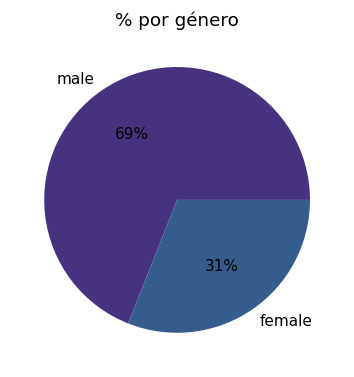

In [10]:
#define Seaborn color palette to use
colors = sns.color_palette('viridis')[0:8]
cant_gender= data['Sex'].value_counts()

#create pie chart
plt.pie(cant_gender, labels=cant_gender.index, colors = colors, autopct='%.0f%%')
plt.title('% por género')
plt.show()

###2.2 Imputación de valores nulos

Se debe realizar un análisis para las columnas ***"Saving accounts" y "Checking account"*** los cuales tienen valores nulos, por tal razón se evalúan los posibles métodos para la imputación de los valores, en el caso de variables categóricas puede usarse:
* los métodos **'ffill' o 'bfill'** para que el valor nulo tome el valor del registro siguiente
* Puede usarse una imputación por moda, en este caso se le asigna a los valores null el valor del registro más repetido en el conjunto de datos
* puede realizarse una imputación de forma aleatoria, de los valores posibles elige al azar un valor para cada uno de los valores nulos

Entre otros métodos de imputación, para el ejercicio se realizará una imputación por valores aleatorios, uno de los puntos a favor de realizar este tipo es para evitar sesgos.

In [11]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


<ipython-input-11-2021d7df9464>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts=True)


In [12]:
data[['Saving accounts', 'Checking account']]

,Saving accounts,Checking account
0,NaN,little
1,little,moderate
2,little,NaN
3,little,little
4,little,little
...,...,...
995,little,NaN
996,little,little
997,little,NaN
998,little,little


Mediante el siguiente gráfico de barras, se representan las variables *'Saving accounts', 'Checking account'*, para visualmente identificar el número de elementos que contienen las columnas

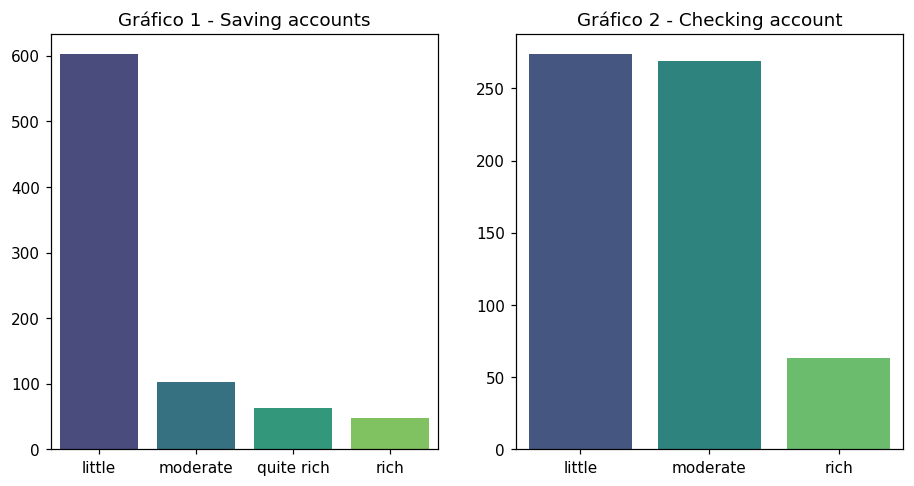

In [13]:
#defino el conteo de valores para las columnas
sa_data = data['Saving accounts'].value_counts()
ca_data = data['Checking account'].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.barplot(x=sa_data.index, y=sa_data.values, data=data, palette="viridis", ax=ax[0])
sns.barplot(x=ca_data.index, y=ca_data.values, data=data, palette="viridis", ax=ax[1])

ax[0].set_title('Gráfico 1 - Saving accounts')
ax[1].set_title('Gráfico 2 - Checking account')
plt.show()

Se procede a realizar el proceso de asignación de valores aleatorios a los valores null, el proceso se realiza para cada una de las columnas implicadas **'Saving accounts' y 'Checking account'**.

In [14]:
null_sa = data['Saving accounts'].isnull()
null_ca = data['Checking account'].isnull()

unique_sa = data['Saving accounts'].dropna().unique()
unique_ca = data['Checking account'].dropna().unique()

data.loc[null_sa, 'Saving accounts'] = np.random.choice(unique_sa, size=len(data[null_sa]))
data.loc[null_ca, 'Checking account'] = np.random.choice(unique_ca, size=len(data[null_ca]))

Se verifica nuevamente que los valores anteriormente identificados como null ya se hayan imputado.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


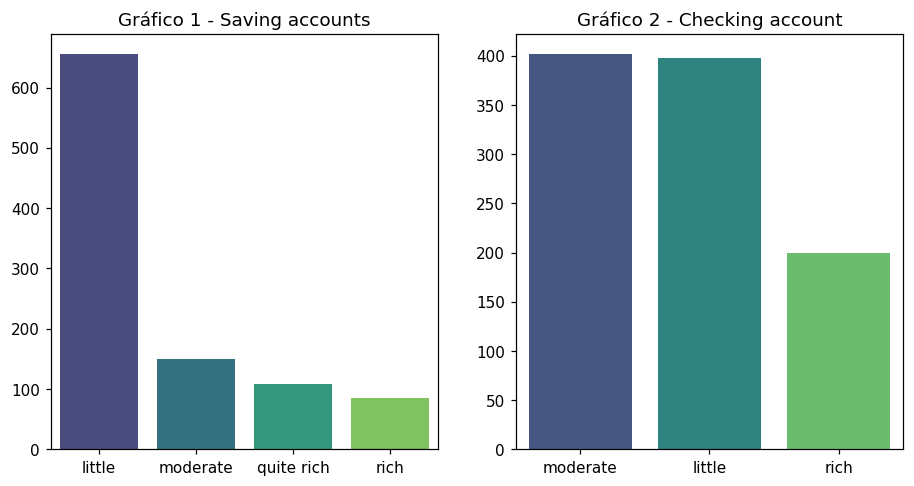

In [16]:
#defino el conteo de valores para las columnas
sa_data = data['Saving accounts'].value_counts()
ca_data = data['Checking account'].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.barplot(x=sa_data.index, y=sa_data.values, data=data, palette="viridis", ax=ax[0])
sns.barplot(x=ca_data.index, y=ca_data.values, data=data, palette="viridis", ax=ax[1])


ax[0].set_title('Gráfico 1 - Saving accounts')
ax[1].set_title('Gráfico 2 - Checking account')
plt.show()

###2.3 Matriz de correlación
La matriz de correlación permite identificar que no hay relaciones fuertes entre caracteristicas; sin embargo, la relación mas fuerte que puede identificarse es entre **"Credit amount" y "Duration"**, evidentemente ya se puede empezar a establecer que no hay tendencias o relaciones fuertes entre las diferentes variables.

para generar una matriz que contenga todas la variables, las categóricas se convienten a número entero y de esta manera se procede a generar la matriz 

In [17]:
data_corr = data.copy()

In [18]:
data_corr['Sex'] = data_corr['Sex'].astype('category').cat.codes
data_corr['Housing'] = data_corr['Housing'].astype('category').cat.codes
data_corr['Saving accounts'] = data_corr['Saving accounts'].astype('category').cat.codes
data_corr['Checking account'] = data_corr['Checking account'].astype('category').cat.codes
data_corr['Purpose'] = data_corr['Purpose'].astype('category').cat.codes
  

<Axes: >

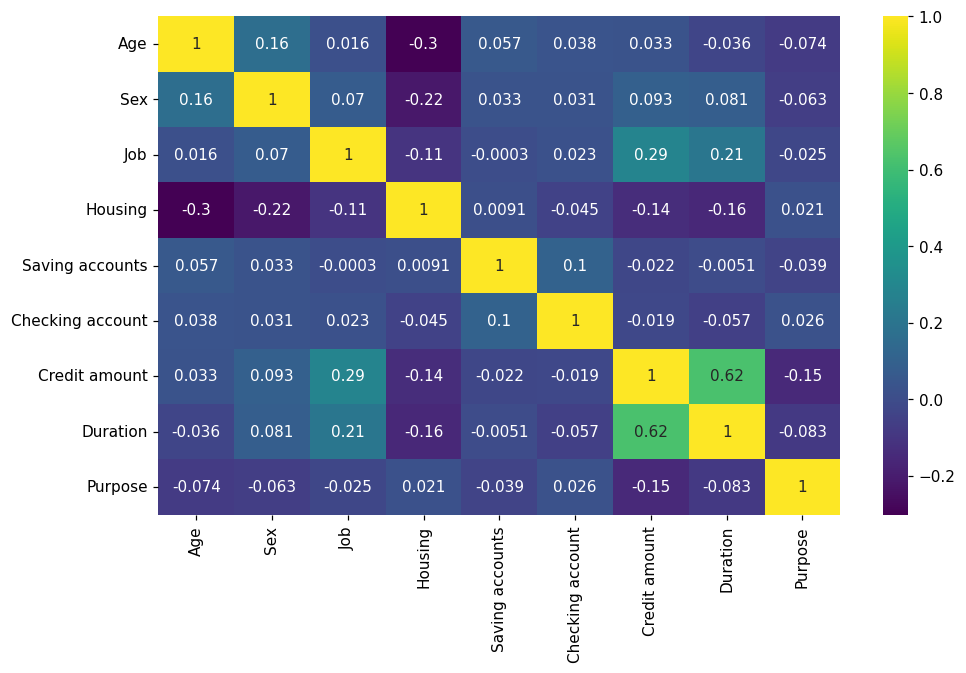

In [19]:
corr_matrix = data_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

A partir de la forma de los grficas, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudar a ver posibles valores atípicos.

1. En la siguiente gráfica identificamos que la columna *Age* (edad) tiene un sesgo a la derecha donde la mayor cantidad de datos se encuentran entre los 20 y 30 años.

2. En la gráfica 2 que corresponde a la columna *'Sex'* que es una variable categórica observamos la distribución de valores entre el 0 y 1

3. La distribución de la columna *Job* ('Empleo') que trata de una variable categórica aunque se encuentre expresada en términos numéricos
* 0 - no calificado y no residente 
* 1 - no calificado y residente,
* 2 - calificado 
* 3 - altamente calificado

4. En la 4 gráfica la columna *'Housing'* corresponde a una variable categorica podemos observar la distribucion de valores

5. En la 5 gráfica la columna *'Saving accounts'* corresponde a una variable categorica podemos observar la distribucion de valores

6. En la 6 gráfica la columna *'Checking account'* corresponde a una variable categorica podemos observar la distribucion de valores

7. En la 3 gráfica, podemos identificar la columna *Credit amount* (Importe del crédito)
que tiene un sesgo a derecha, donde la mayoría de datos se encuentran entre los 2000 y 5000.

8. En la gráfica 4 identificamos la columna *Duration* (Duración - meses) del crédito, podemos ver que la distribución tiene un sesgo, y los valores en su mayoría se encuntran entre 10 y 20.

9. En la 6 gráfica la columna *'Purpose'* corresponde a una variable categórica podemos observar la distribución de valores



<ipython-input-20-33ce8b5a09ed>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_corr.hist(ax = ax)


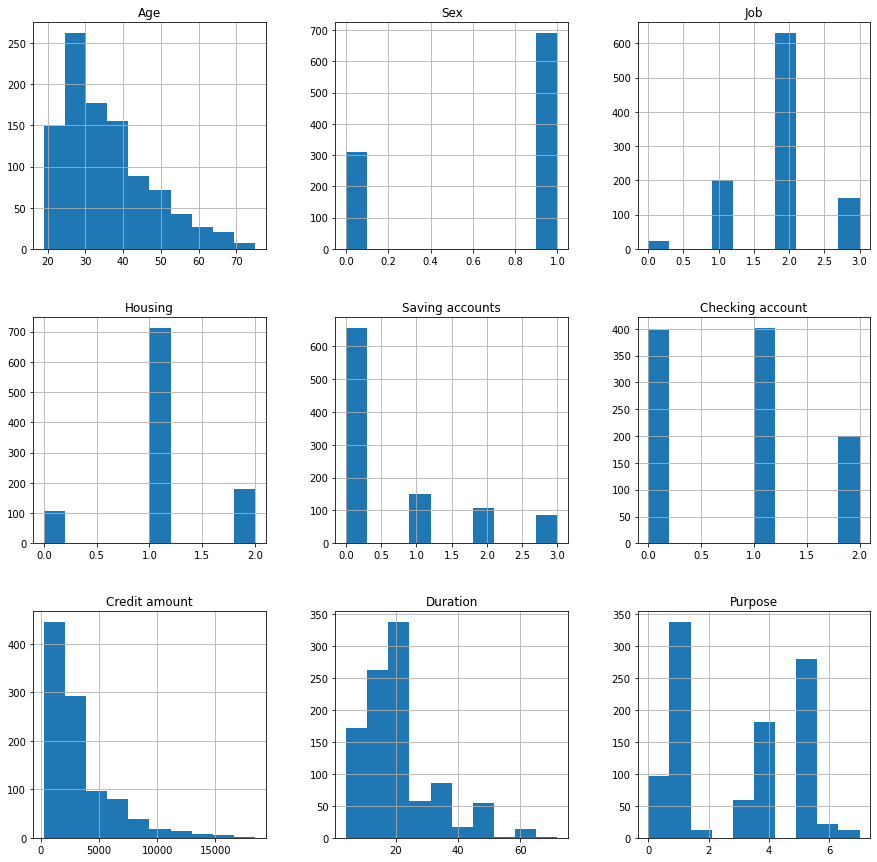

In [20]:
%matplotlib inline
# Univariate Histograms
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
data_corr.hist(ax = ax)
plt.show()

In [21]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int8 
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int8 
 4   Saving accounts   1000 non-null   int8 
 5   Checking account  1000 non-null   int8 
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int8 
dtypes: int64(4), int8(5)
memory usage: 36.3 KB


De esta manera se puedo realizar los ajustes necesarios en el conjunto de datos, donde se exploran y realizan los procesos para mejorar la calidad de los datos de cara a un correcto análisis de datos.

###2.4 Verificación de valores duplicados
Se ejecuta el comando duplicated() con el propósito de verificar si existen valores complemente duplicados en todo el conjunto de datos.

In [22]:
data.duplicated().value_counts()

False    1000
dtype: int64

## **3. Análisis de Datos**


---

* De acuerdo a la matriz de correlación, puede identificarse que no existen variables que estén fuertemente correlacionadas, por lo que no es probable que haya algún tipo de inferencia de una variable sobre otra en la mayoría de variables, sin embargo, puede percibirse que hay algunas variables que muestran relaciones que vamos a analizar mediante el uso de gráficos, estas relaciones se dan entre:

 **'Credit amount' - 'Duration'** esta relacion con 0.62 de coeficiente de correlacion

 **'Housing' - 'Age'** esta relacion tiene un -0.3 de coeficiente de correlación inversa

 **'Credit amount' - 'Job'** esta relacion con un 0.29 de coeficiente de correlación



### 3.1 Gráfico de Barplot para análisis de propósito en función del valor del crédito segmentado por sexo

En el siguiente gráfico de barras podemos identificar por género, el crédito solicitado y su propósito, encontrando que en su mayoría tanto mujeres como hombres destinan crédito en vacatations/others; sin embargo, podemos notar que proporciona algúna indicación de la incertidumbre en torno a esa estimación utilizando barras de error, claramente para el **'Sex' - 'Female' - 'Vacations'** la barra de error es batante pronunciada. 

In [23]:
data_corr['Sex'].replace({0:"Female",1:"Male"}, inplace=True)

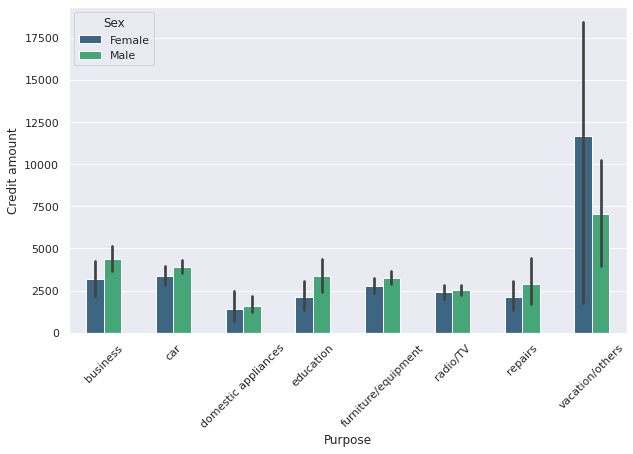

In [24]:
data_corr['Sex'] = data_corr['Sex'].astype('category')
data_corr['Purpose'] = data_corr['Purpose'].astype('category')
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.0)

ax = sns.barplot(x='Purpose', y='Credit amount',hue='Sex', data=data_corr, width=0.5, errorbar=('ci', 95), palette='viridis')

plt.xticks([0,1,2,3,4,5,6,7], ['business', 'car', 'domestic appliances', 'education','furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'])
plt.xticks(rotation=45)
plt.show()

###3.2 Gráfico Boxplot para análisis de Job por el Credit Amount

En el siguiente gráfico se puede identificar  

(array([0, 1, 2, 3]),
 [Text(0, 0, 'unskilled and non-resident'),
  Text(1, 0, 'unskilled and resident'),
  Text(2, 0, 'skilled'),
  Text(3, 0, 'highly skilled')])

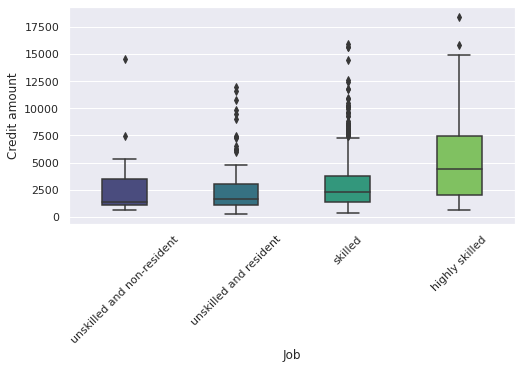

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_corr, x="Job", y="Credit amount", width=0.4, dodge=False, palette='viridis')
plt.xticks([0,1,2,3], ["unskilled and non-resident", "unskilled and resident", "skilled","highly skilled"])
plt.xticks(rotation=45)

#### 3.2.1 Gráfico de Catplot para analizar detalle de outliers
Análisis en detalle del los outliers que se muestran para el job *skilled* por medio de un catplot de seaborn, nos muestra mas a detalle la distribución que presenta.

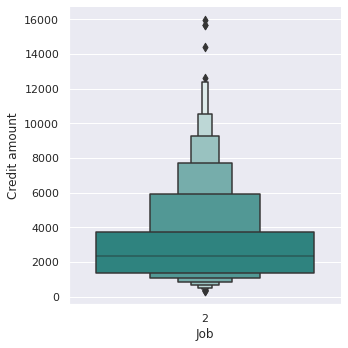

In [26]:
data_verify = data_corr[(data_corr['Job']==2)&(['Credit amount'])]
sns.catplot(x='Job', y='Credit amount', data=data_verify, kind="boxen", palette='viridis')

### 3.3 Estadística Descriptiva para calcular la relación entre variables
en la siguiente función podemos evaluar la relación entre las variables **'Crédito amount' y 'Duration'**

El coeficiente de correlación de Pearson es una medida estadística que indica el grado de relación lineal entre dos variables continuas.

El coeficiente de correlación de Pearson toma valores entre -1 y 1, donde -1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye), 1 indica una correlación positiva perfecta (cuando una variable aumenta, la otra también aumenta) y 0 indica ausencia de correlación lineal.

El pvalor indica sobre la validez de la estimación de la correlación. En este caso, la prueba le está diciendo que hay mucha certeza de que la correlación sea baja. Es decir, que es muy poco probable que exista alguna relación lineal entre los datos.

In [27]:
def relación_alta_significativa(var_a, var_b , confianza = 0.95, min_mag = 0.5,):
   # Calcule el coeficiente de correlación con su p-valor asociado.
  corr, pvalor = stats.pearsonr(data_corr[var_a], data_corr[var_b])
  if abs(corr) < min_mag:
    print(f"Las columnas {var_a} y {var_b} donde el coeficiente {corr:.2f} es menor que {min_mag} nos indica que NO hay un alto coeficiente de correlacion entre las variables")
    return
  
  # Comprobamos si el valor p es menor que el nivel de significancia especificado
  es_alta_significativa = 1 - confianza # Utilice los resultados obtenidos para determinar si la correlación es aceptada.
  if pvalor < es_alta_significativa:
      print(f"Las columnas {var_a} y {var_b} con un coeficiente {corr:.2f} y un pvalor {pvalor:.3f} nos indica que hay una alta probabilidad de que la correlación encontrada no sea un resultado del azar.")
  else:
      print(f"Las columnas {var_a} y {var_b} con un coeficiente {corr:.2f} y un pvalor {pvalor:.3f} nos indica que NO hay una alta probabilidad de que halla relación entre las variables.")
  return 

In [28]:
relación_alta_significativa('Credit amount', 'Duration')

Las columnas Credit amount y Duration con un coeficiente 0.62 y un pvalor 0.000 nos indica que hay una alta probabilidad de que la correlación encontrada no sea un resultado del azar.


In [29]:
relación_alta_significativa('Credit amount', 'Job')

Las columnas Credit amount y Job donde el coeficiente 0.29 es menor que 0.5 nos indica que NO hay un alto coeficiente de correlacion entre las variables


In [30]:
relación_alta_significativa('Housing', 'Age')

Las columnas Housing y Age donde el coeficiente -0.30 es menor que 0.5 nos indica que NO hay un alto coeficiente de correlacion entre las variables


###3.4 Gráfico Scatterplot para análisis de distribución entre Credit amount y Age, distribuido por Sex

En la siguiente gráfica podemos identificar que no hay una tendencia entre las tres variables, solo se puede identificar que son dispersas por completo sin tener una tendencia debidamente marcada.

Incluso puede apreciarse que más del 50% de las personas en todas las edades solicitan créditos entre 0 y 5000 marcos alemanes


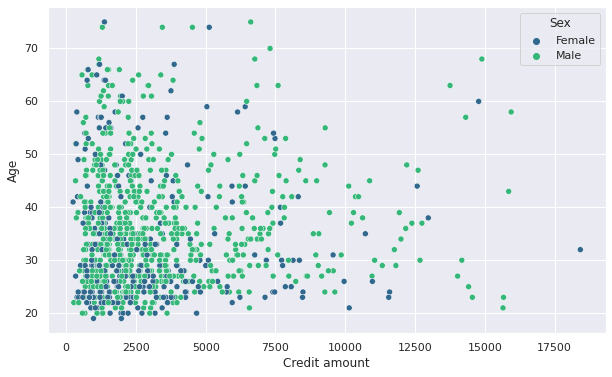

In [31]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_corr, x="Credit amount", y="Age", hue='Sex', palette='viridis')
plt.show()


###3.5 Gráfica Distplot para analizar la frecuencia de 'Duration' por 'Sex'

La siguiente gráfica nos muestra la forma de la distribución y la frecuencia relativa de los valores de la variable *'Duration'* segmentado por *'Sex'*

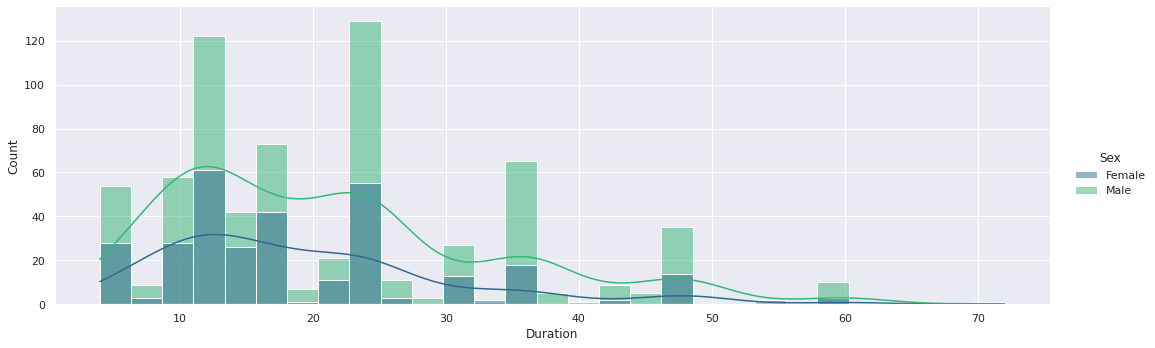

In [32]:
sns.displot(data=data_corr,x='Duration',hue='Sex',kde=True,palette='viridis',aspect=3);

### 3.6 Gráfica de Boxplot para analizar las variablas *'Housing'* y *'Age'*

se muestra la distribución de la relación entre housing y age y podemos apreciar que el 50% de los que son owner se encuentran en un rango de edad entre los 35 y 52 años.

(array([0, 1, 2]), [Text(0, 0, 'own'), Text(1, 0, 'rent'), Text(2, 0, 'free')])

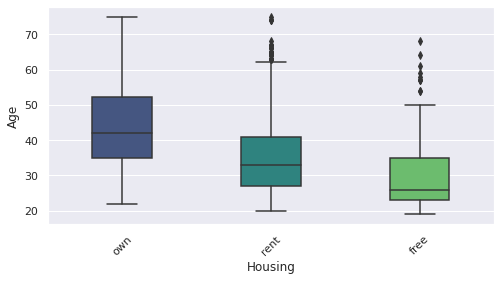

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_corr, x="Housing", y="Age", width=0.4, dodge=False, palette='viridis')
plt.xticks([0,1,2], ['own', 'rent', 'free'])
plt.xticks(rotation=45)

## **Créditos**
---

* **Recursos consultado:** 
  - [Kaggle](https://www.kaggle.com/datasets/uciml/german-credit)
  - [Medium](https://towardsdatascience.com/german-credit-data-part-1-exploratory-data-analysis-8f5f266b2426)
  - [ChatGPT](https://chat.openai.com/)
  - [Seaborn](https://seaborn.pydata.org/)
  -[Pandas](https://pandas.pydata.org/) 


**Universidad Nacional de Colombia**